## Part 1: Import Libraries and Generate Dataset

In this section, I import all the necessary libraries and generate a synthetic classification dataset using `make_classification`.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold, RepeatedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from scipy.stats import sem

In [ ]:
X, y = make_classification(n_samples=1000, n_features=20,
                           n_informative=15, n_redundant=5, random_state=1)
print(f"Dataset shape: X={X.shape}, y={y.shape}")

Dataset shape: X=(1000, 20), y=(1000,)


## Part 2: Single 10-Fold Cross-Validation

Here, I apply standard 10-fold cross-validation using logistic regression. This allows me to evaluate model performance on different train-test splits.

In [ ]:
kf = KFold(n_splits=10, shuffle=True, random_state=1)
model = LogisticRegression(max_iter=1000)
scores = cross_val_score(model, X, y, scoring='accuracy', cv=kf, n_jobs=-1)
print(f"Single 10-Fold Accuracy: {np.mean(scores):.4f} (+/- {np.std(scores):.4f})")

Single 10-Fold Accuracy: 0.8680 (+/- 0.0319)


## Part 3: Repeated K-Fold Cross-Validation

To reduce variance and better estimate model performance, I use Repeated K-Fold validation. I repeat the 10-fold cross-validation multiple times (1 to 15) and collect accuracy scores.

### Boxplot Visualization
Each box in the plot below summarizes the accuracy scores under different repeat counts.

In [ ]:
repeats = range(1, 16)
results = []
for r in repeats:
    rkf = RepeatedKFold(n_splits=10, n_repeats=r, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=rkf, n_jobs=-1)
    results.append(scores)
    print(f"{r} repeats: mean={np.mean(scores):.4f}, SE={sem(scores):.4f}")

1 repeats: mean=0.8680, SE=0.0106
2 repeats: mean=0.8675, SE=0.0079
3 repeats: mean=0.8673, SE=0.0058
4 repeats: mean=0.8670, SE=0.0060
5 repeats: mean=0.8658, SE=0.0051
6 repeats: mean=0.8655, SE=0.0045
7 repeats: mean=0.8651, SE=0.0040
8 repeats: mean=0.8651, SE=0.0037
9 repeats: mean=0.8656, SE=0.0034
10 repeats: mean=0.8658, SE=0.0032
11 repeats: mean=0.8655, SE=0.0030
12 repeats: mean=0.8654, SE=0.0029
13 repeats: mean=0.8652, SE=0.0028
14 repeats: mean=0.8651, SE=0.0027
15 repeats: mean=0.8653, SE=0.0026


<ipython-input-5-0d45d33930ac>:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(results, labels=[str(r) for r in repeats], showmeans=True)


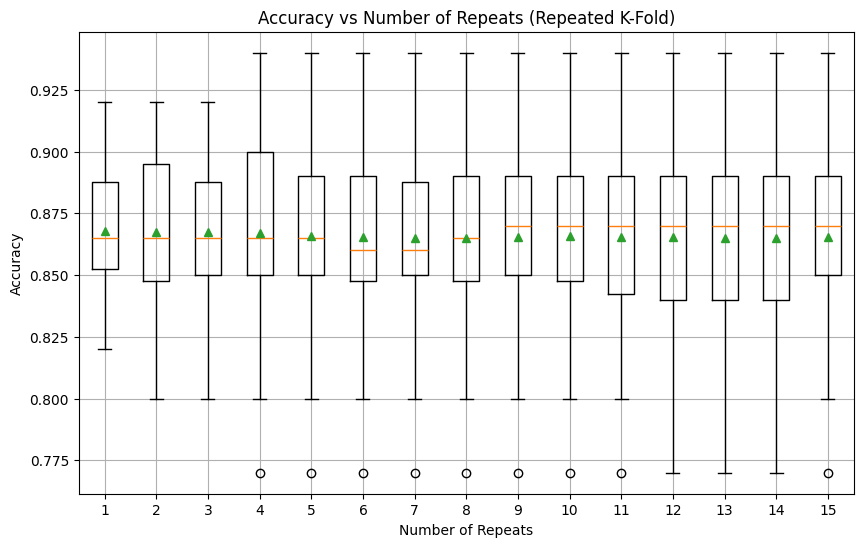

In [ ]:
plt.figure(figsize=(10,6))
plt.boxplot(results, labels=[str(r) for r in repeats], showmeans=True)
plt.title("Accuracy vs Number of Repeats (Repeated K-Fold)")
plt.xlabel("Number of Repeats")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

## Part 4: Improving Accuracy

Now I try several ways to improve model performance:

- Standardizing features for logistic regression
- Trying a Random Forest Classifier
- Trying an SVM with RBF kernel

In [ ]:
scaled_model = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))
rkf = RepeatedKFold(n_splits=10, n_repeats=5, random_state=1)
scaled_scores = cross_val_score(scaled_model, X, y, scoring='accuracy', cv=rkf, n_jobs=-1)
print(f"Standardized Logistic Regression (Repeated 5x10): {np.mean(scaled_scores):.4f}")

Standardized Logistic Regression (Repeated 5x10): 0.8652


In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=1)
rf_scores = cross_val_score(rf_model, X, y, scoring='accuracy', cv=rkf, n_jobs=-1)
print(f"Random Forest (Repeated 5x10): {np.mean(rf_scores):.4f}")

Random Forest (Repeated 5x10): 0.9214


In [ ]:
svm_model = make_pipeline(StandardScaler(), SVC(kernel='rbf'))
svm_scores = cross_val_score(svm_model, X, y, scoring='accuracy', cv=rkf, n_jobs=-1)
print(f"SVM with RBF Kernel (Repeated 5x10): {np.mean(svm_scores):.4f}")

SVM with RBF Kernel (Repeated 5x10): 0.9654


## Part 5: Summary and Conclusion

This assignment explored the implementation and evaluation of **k-fold and repeated k-fold cross-validation** using synthetic data and various classification models. The key findings are as follows:

In [ ]:
print("\nSummary of Model Accuracies:")
print(f"Original Logistic Regression: {np.mean(scores):.4f}")
print(f"Standardized Logistic Regression: {np.mean(scaled_scores):.4f}")
print(f"Random Forest: {np.mean(rf_scores):.4f}")
print(f"SVM (RBF): {np.mean(svm_scores):.4f}")


Summary of Model Accuracies:
Original Logistic Regression: 0.8653
Standardized Logistic Regression: 0.8652
Random Forest: 0.9214
SVM (RBF): 0.9654



- **Model Accuracy Comparison**  
  - Original Logistic Regression: 0.8653  
  - Standardized Logistic Regression: 0.8652  
  - Random Forest: 0.9214  
  - SVM with RBF Kernel: 0.9654

The significant accuracy improvement from the SVM model suggests that the synthetic dataset may contain **non-linear patterns** that are not well captured by linear models like logistic regression. The RBF kernel in SVM effectively models these complexities, leading to superior performance.

Additionally, **Repeated K-Fold Cross-Validation** proved more reliable than a single 10-fold split. As the number of repeats increased, the variation in model accuracy across folds decreased, which confirms its ability to smooth out the randomness from individual splits and provide a **more stable estimate** of generalization performance.

While standardizing features had minimal impact in this specific case, it remains a good practice, particularly when using algorithms sensitive to feature scaling.

The **boxplot visualization** was helpful to show accuracy stabilization with more repetitions, but future work could enhance clarity by adding annotations or textual descriptions that interpret the visual trends directly for the reader.

---

### Final Thoughts

- For further improvement, hyperparameter tuning (e.g., via `GridSearchCV`) could be conducted to further optimize each model.
- Model **interpretability** and **computational efficiency** should also be considered when applying these methods to real-world data.
- Lastly, applying the same methodology to real-world datasets would allow assessment of model robustness under more complex, noisy, or imbalanced conditions.

This exercise illustrates that careful **validation strategy**, thoughtful **model selection**, and **result interpretation** are all critical to building effective and reliable machine learning solutions.
